In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
try:
    import os
except ImportError:
    !pip install os
    import os

try:
    import cv2
except ImportError:
    !pip install opencv-python
    import cv2

try:
    import pandas as pd
except ImportError:
    !pip install pandas
    import pandas as pd

try:
    import numpy as np
except ImportError:
    !pip install numpy
    import numpy as np

try:
    from sklearn.model_selection import train_test_split
except ImportError:
    !pip install scikit-learn
    from sklearn.model_selection import train_test_split

try:
    import tensorflow as tf
except ImportError:
    !pip install tensorflow
    import tensorflow as tf

try:
    from keras.models import Sequential
    from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
except ImportError:
    !pip install keras
    from keras.models import Sequential
    from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import matplotlib.pyplot as plt
import time

In [26]:
# Load and Preprocess Data
def load_data(image_folder, annotation_file):
    images = []
    annotations = pd.read_csv(annotation_file)

    for filename in os.listdir(image_folder):
        img = cv2.imread(os.path.join(image_folder, filename))
        img = cv2.resize(img, (426, 240))  # Resize image to desired dimensions
        images.append(img)

    return np.array(images), annotations


# Define Model Architecture
def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(48, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(48, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    return model



# Step 3: Compile the Model
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Step 4: Train the Model
def train_model(model, X_train, y_train, X_test, y_test, epochs=12, batch_size=16):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
    return history

def evaluate_model(model, X_test, y_test):
    start_time = time.time()
    loss, accuracy = model.evaluate(X_test, y_test)
    end_time = time.time()
    print("")
    print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
    print("")
    print(f'Evaluation Time: {end_time - start_time} seconds')
    return loss, accuracy

In [27]:
# Load data
image_folder = "/content/drive/MyDrive/LUDUS/YOLO_dataset"
annotation_file = "/content/drive/MyDrive/LUDUS/needed_data/dataset_csv_labeling.csv"
images, annotations = load_data(image_folder, annotation_file)

annotations_df = pd.read_csv(annotation_file, delimiter=';')

annotations_df.head()

,frame_name,correct/incorrect
0,frame1.jpg,correct
1,frame2.jpg,correct
2,frame3.jpg,correct
3,frame4.jpg,correct
4,frame5.jpg,incorrect


In [28]:
# Declare X and y
X = images
y = annotations_df['correct/incorrect']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert string labels to numeric
y_train = (y_train == 'correct').astype(int)
y_test = (y_test == 'correct').astype(int)

In [29]:
# def build_model(hp):
#     model = Sequential()
#     model.add(Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=16),
#                      (3, 3),
#                      activation='relu',
#                      input_shape=(240, 426, 3)))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(hp.Int('conv2_units', min_value=32, max_value=128, step=16),
#                      (3, 3),
#                      activation='relu'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(hp.Int('dense_units', min_value=32, max_value=128, step=16),
#                     activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))

#     model.compile(optimizer='adam',
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])

#     return model

# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=5,  # Adjust this value as needed
#     executions_per_trial=1,
#     directory='my_dir',
#     project_name='hyperparameter_tuning')

# tuner.search(X_train, y_train,
#              epochs=22,
#              validation_data=(X_test, y_test))

# # Get the best hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"""
# The hyperparameter search is complete. The optimal number of conv1_units is {best_hps.get('conv1_units')},
# the optimal number of conv2_units is {best_hps.get('conv2_units')},
# and the optimal number of dense_units is {best_hps.get('dense_units')}.
# """)

In [30]:
# Create model
input_shape = X_train[0].shape
model = create_model(input_shape)

Epoch 1/12
6/6 [==============================] - 11s 2s/step - loss: 6.3127 - accuracy: 0.6593 - val_loss: 0.7105 - val_accuracy: 0.3250
Epoch 2/12
6/6 [==============================] - 9s 2s/step - loss: 0.6220 - accuracy: 0.6484 - val_loss: 0.6341 - val_accuracy: 0.6750
Epoch 3/12
6/6 [==============================] - 10s 2s/step - loss: 0.5647 - accuracy: 0.7363 - val_loss: 0.5983 - val_accuracy: 0.6750
Epoch 4/12
6/6 [==============================] - 10s 2s/step - loss: 0.5055 - accuracy: 0.7473 - val_loss: 0.6420 - val_accuracy: 0.5500
Epoch 5/12
6/6 [==============================] - 10s 2s/step - loss: 0.4653 - accuracy: 0.7473 - val_loss: 0.8947 - val_accuracy: 0.4250
Epoch 6/12
6/6 [==============================] - 10s 2s/step - loss: 0.5883 - accuracy: 0.6923 - val_loss: 0.6220 - val_accuracy: 0.6750
Epoch 7/12
6/6 [==============================] - 9s 2s/step - loss: 0.4811 - accuracy: 0.8242 - val_loss: 0.5668 - val_accuracy: 0.6750
Epoch 8/12
6/6 [====================

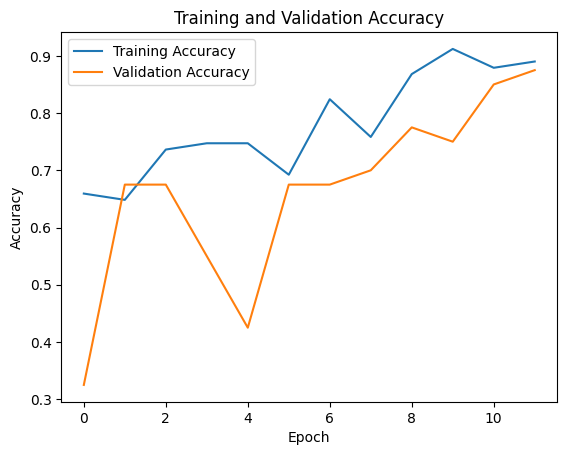

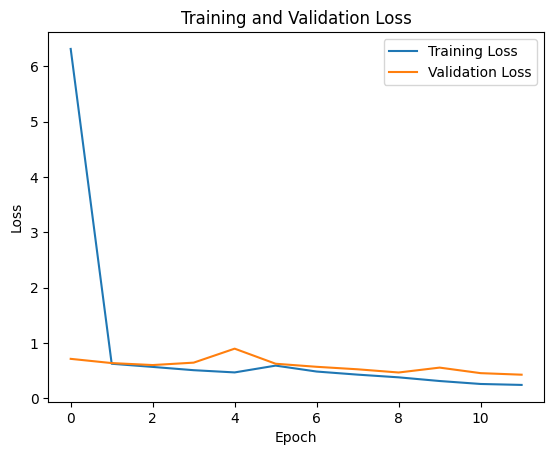

In [31]:
# Compile model
compile_model(model)

# Train model
history = train_model(model, X_train, y_train, X_test, y_test)

# Evaluate model
loss, accuracy = evaluate_model(model, X_test, y_test)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()